In [3]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
model_1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
prompt = "A futuristic city skyline at sunset, flying cars, neon signs, cyberpunk aesthetic, ultra-detailed, cinematic lighting."

In [10]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

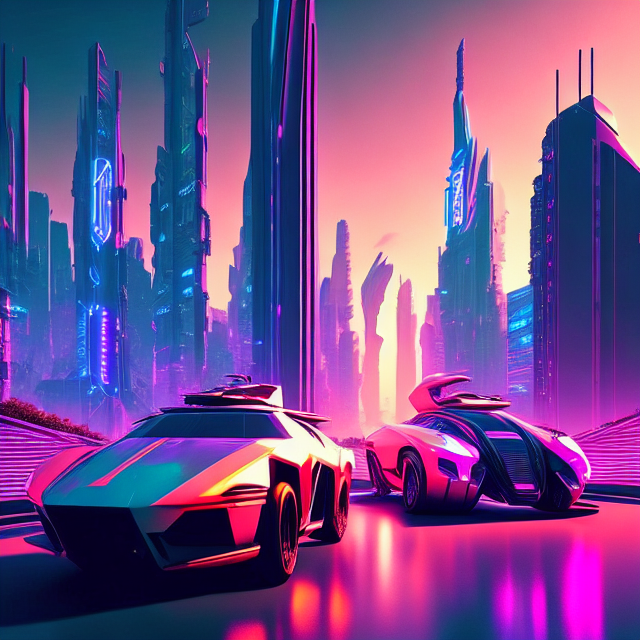

In [11]:
image

In [14]:
prompt2 = """A breathtaking waterfall cascading into a crystal-clear lake, surrounded by lush greenery, sunrays shining through the mist."""

In [15]:
image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

PROMPT:  A breathtaking waterfall cascading into a crystal-clear lake, surrounded by lush greenery, sunrays shining through the mist.


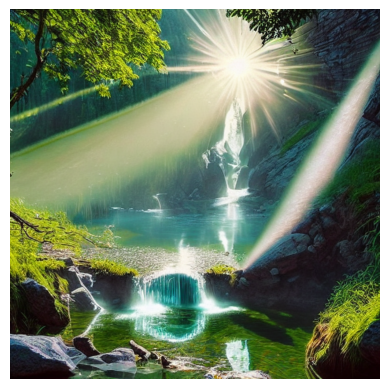

In [16]:
print('PROMPT: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [39]:
prompt3 = """A Victorian-era detective, holding a lantern, foggy London streets, noir-inspired painting style."""

In [40]:
image = pipe(prompt3).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

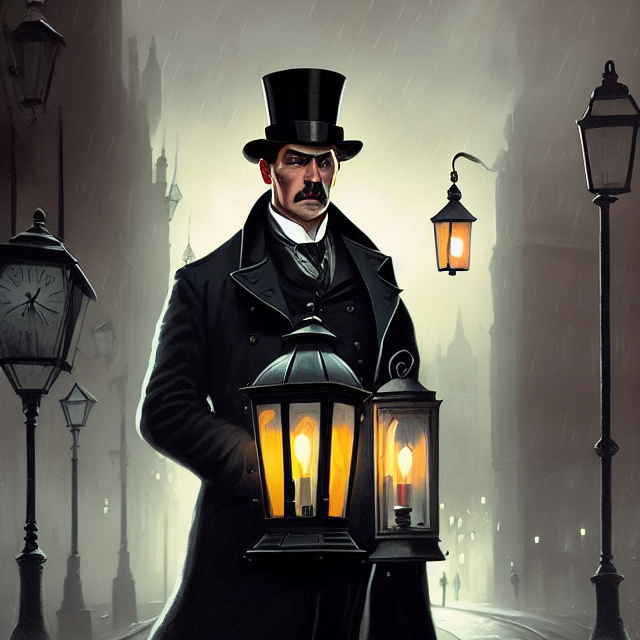

In [41]:
image

# Parameters:
        model_pipeline (StableDiffusionPipeline): The preloaded Stable Diffusion model.
        text_prompt (str): The input text prompt for image generation.
        settings (dict): Dictionary containing generation parameters such as:
                          - 'negative_prompt': Optional text to exclude certain elements.
                          - 'num_inference_steps': Number of diffusion steps.
                          - 'height': Image height.
                          - 'width': Image width.
                          - 'num_images_per_prompt': Number of images to generate.

In [18]:
import matplotlib.pyplot as plt

def generate_images(model_pipeline, text_prompt, settings):
    """
    Generates images using the Stable Diffusion pipeline based on the provided prompt and settings.

    Arguments:
        model_pipeline (StableDiffusionPipeline): The preloaded Stable Diffusion model.
        text_prompt (str): The input text prompt for image generation.
        settings (dict): Dictionary containing generation parameters.

    Returns:
        Displays the generated images using Matplotlib.
    """
    # Generate images
    images = model_pipeline(text_prompt, **settings).images

    # Determine the number of generated images
    total_images = len(images)

    # Display images
    if total_images > 1:
        fig, axes = plt.subplots(1, total_images, figsize=(total_images * 4, 4))
        if total_images == 1:
            axes = [axes]  # Ensure axes is iterable for a single image
        for idx, image in enumerate(images):
            axes[idx].imshow(image)
            axes[idx].axis('off')
    else:
        plt.figure(figsize=(5, 5))
        plt.imshow(images[0])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [22]:
prompt = """An astronaut floating in deep space, reaching towards a glowing cosmic portal, vibrant nebula in the background, hyper-detailed."""

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

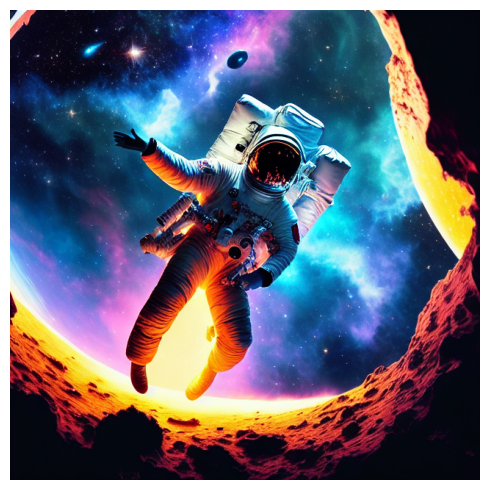

In [23]:
generate_images(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

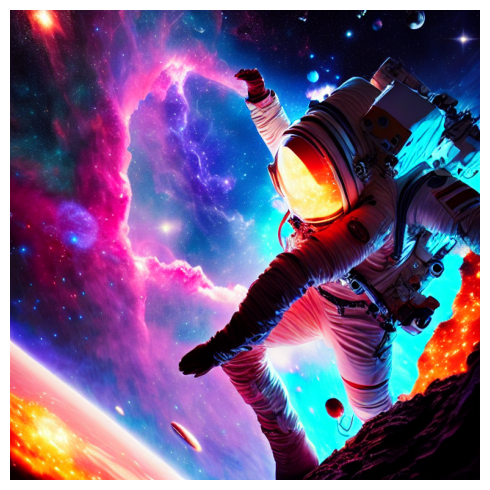

In [24]:
#num inference steps
params = {'num_inference_steps': 100}

generate_images(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

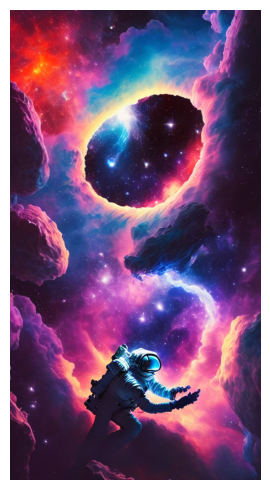

In [25]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_images(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

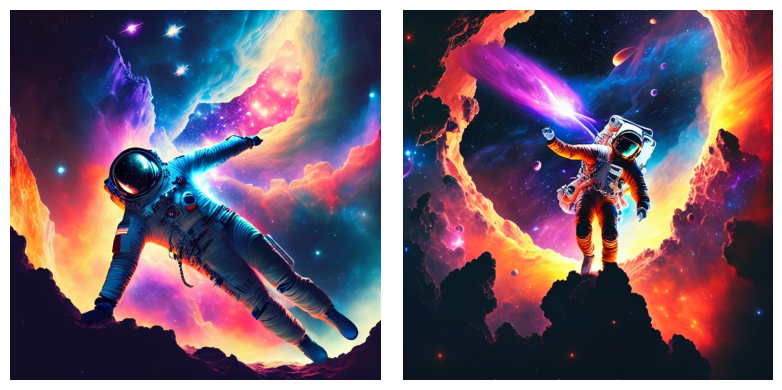

In [27]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_images(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

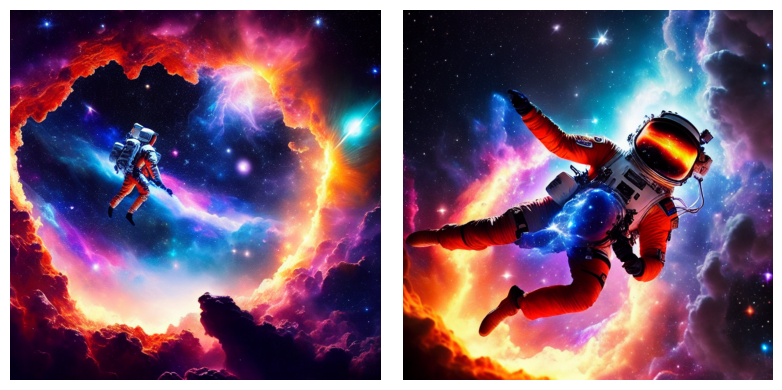

In [29]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_images(pipe, prompt, params)